## Mushroom Classification

### Content

This dataset includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family Mushroom drawn from The Audubon Society Field Guide to North American Mushrooms (1981). Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one. The Guide clearly states that there is no simple rule for determining the edibility of a mushroom; no rule like "leaflets three, let it be'' for Poisonous Oak and Ivy.

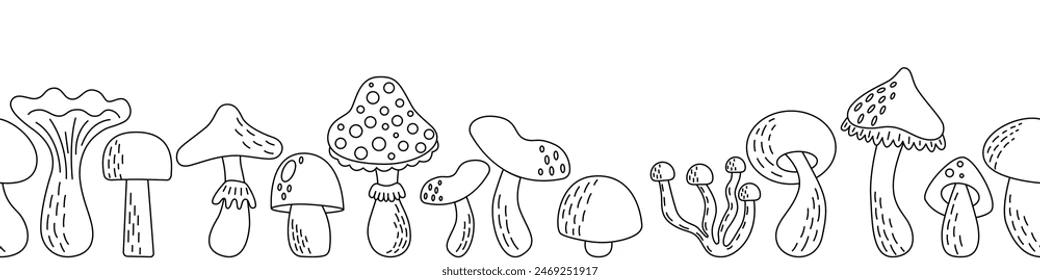

### Attribute Information: 

classes: edible=e, poisonous=p

cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s

cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

bruises: bruises=t,no=f

odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

gill-attachment: attached=a,descending=d,free=f,notched=n

gill-spacing: close=c,crowded=w,distant=d

gill-size: broad=b,narrow=n

gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

stalk-shape: enlarging=e,tapering=t

stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

veil-type: partial=p,universal=u

veil-color: brown=n,orange=o,white=w,yellow=y

ring-number: none=n,one=o,two=t

ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

#### Importing the libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from math import sqrt
import seaborn as sns
from sklearn.metrics import classification_report

In [2]:
# Reading the dataset

In [3]:
df=pd.read_csv("mushrooms.csv")
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [5]:
df.tail()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l
8123,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,o,c,l


In [6]:
# Checking for null values

In [7]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [8]:
#There are no null values are present in dataset

In [9]:
# Select the first 13 columns
selected_columns = df.iloc[:, :13]
selected_columns.describe(include='all')


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,2,5,4
top,e,x,y,n,f,n,f,c,b,b,t,b,s
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,3776,5176


In [10]:
# columns from 14 to 23
selected_columns = df.iloc[:, 14:23]
selected_columns.describe(include='all')

,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,9,9,1,4,3,5,9,6,7
top,w,w,p,w,o,p,w,v,d
freq,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [11]:
#data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [12]:
print("duplicated values :-",df.duplicated().sum())

duplicated values :- 0


In [13]:
print("No of rows in a data :-",df.shape[0])
print("No of columns in data :-",df.shape[1])

No of rows in a data :- 8124
No of columns in data :- 23


In [14]:
# There are 8124 rows and 23 columns

In [15]:
#Creating a copy of dataset
df1=df.copy()

In [16]:
df['class'].value_counts()

class
e    4208
p    3916
Name: count, dtype: int64

In [17]:
# It shows there are total 4208 edible mushrooms and 3916 Poisonus mushrooms  available.

### Exploratory Data Analysis (EDA):

In [18]:
### cap-shape: Bell=b,Conical=c,Convex=x,Flat=f, Knobbed=k,Sunken=s

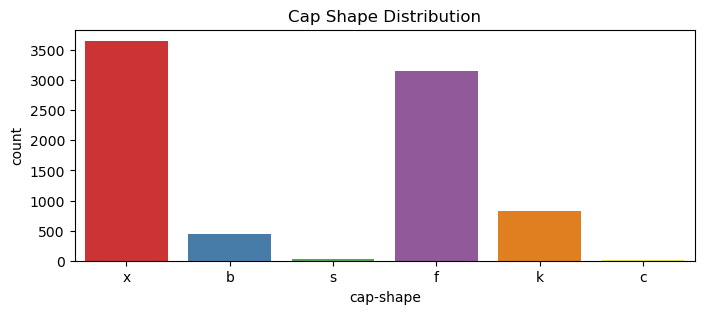

In [19]:
# Bar Graph for Cap shape distribution.
plt.figure(figsize=(8,3))
sns.countplot(x='cap-shape', data=df, palette='Set1')
plt.title('Cap Shape Distribution')
plt.show()

#### Observations :-

In [20]:
### cap-shape: Bell=b,Conical=c,Convex=x,Flat=f, Knobbed=k,Sunken=s
### cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

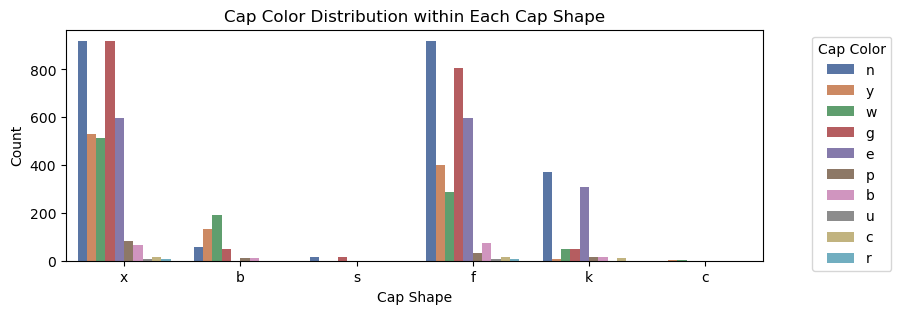

In [21]:
#Cap Color Distribution within Each Cap Shape
plt.figure(figsize=(9, 3))
sns.set_palette('deep')
sns.countplot(data=df, x='cap-shape', hue='cap-color')
plt.title('Cap Color Distribution within Each Cap Shape')
plt.xlabel('Cap Shape')
plt.ylabel('Count')
plt.legend(title='Cap Color', bbox_to_anchor=(1.06, 1), loc='upper left')
plt.show()

#### Observations:-

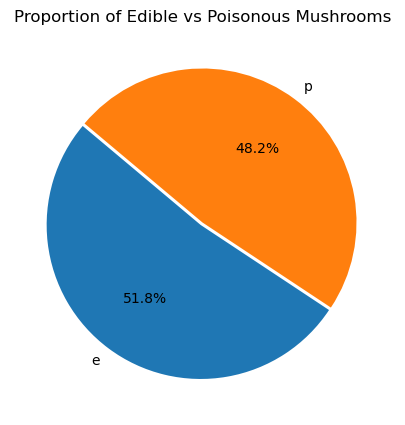

In [22]:
#Proportion of Edible vs Poisonous Mushrooms
explode=[0.02,0]
class_counts = df['class'].value_counts()
plt.figure(figsize=(8, 5))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=140, colors=['#1f77b4', '#ff7f0e'], explode=explode)
plt.title('Proportion of Edible vs Poisonous Mushrooms')
plt.show()

#### Observations:-

In [23]:
### cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

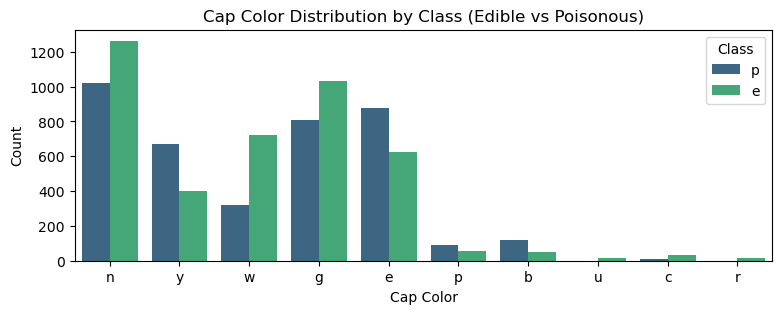

In [24]:
#Cap Color Distribution by Class (Edible vs Poisonous)
plt.figure(figsize=(9, 3))
sns.countplot(data=df, x='cap-color', hue='class', palette='viridis')
plt.title('Cap Color Distribution by Class (Edible vs Poisonous)')
plt.xlabel('Cap Color')
plt.ylabel('Count')
plt.legend(title='Class')
plt.show()

#### Observations:-

In [25]:
# odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

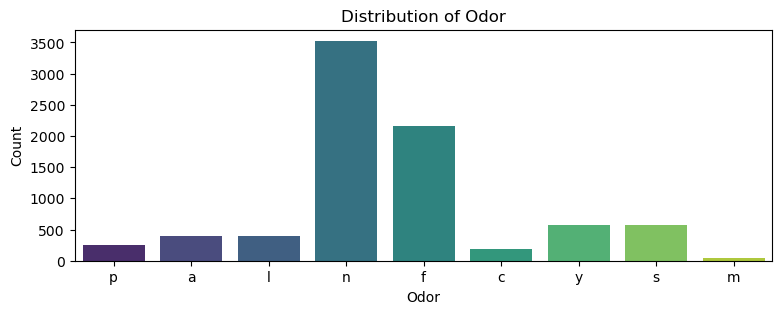

In [26]:
# Distribution of Odor
plt.figure(figsize=(9, 3))
sns.countplot(data=df, x='odor', palette='viridis')
plt.title('Distribution of Odor')
plt.xlabel('Odor')
plt.ylabel('Count')
plt.show()

#### Observations

In [27]:
#gill-attachment: attached=a,descending=d,free=f,notched=n

[]

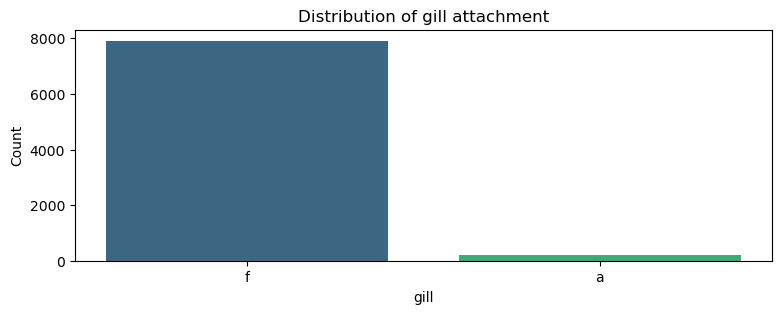

In [28]:
#Distribution of gill attachment
plt.figure(figsize=(9,3))
sns.countplot(data=df,x='gill-attachment', palette='viridis')
plt.title("Distribution of gill attachment")
plt.xlabel("gill")
plt.ylabel("Count")
plt.plot()

#### Observations

In [29]:
# population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

[]

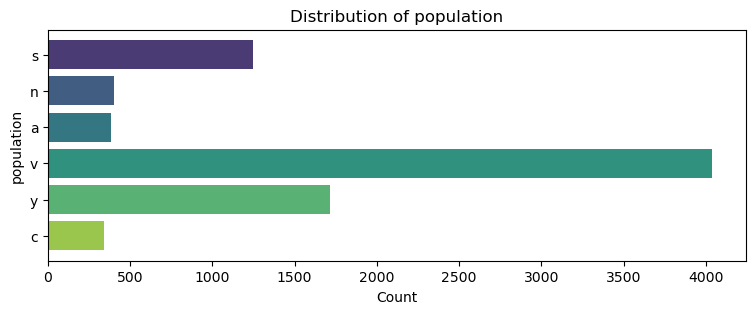

In [30]:
#Distribution of mushrrom population
plt.figure(figsize=(9,3))
sns.countplot(data=df,y='population', palette='viridis')
plt.title("Distribution of population")
plt.ylabel("population")
plt.xlabel("Count")
plt.plot()

In [31]:
df["population"].value_counts()

population
v    4040
y    1712
s    1248
n     400
a     384
c     340
Name: count, dtype: int64

In [32]:
# habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

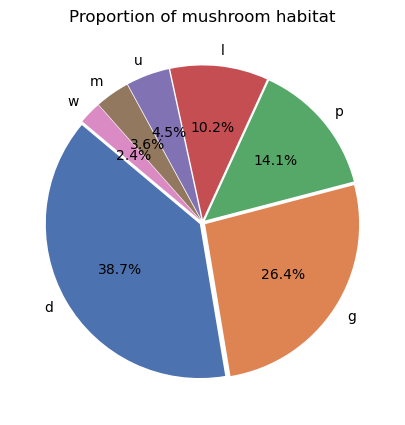

In [33]:
#Proportion of mushroom habitat
explode=[0.02,0.02,0.02,0.02,0.02,0.02,0.02]
class_counts = df['habitat'].value_counts()
plt.figure(figsize=(8, 5))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=140, explode=explode)
plt.title('Proportion of mushroom habitat')
plt.show()

In [34]:
df["habitat"].value_counts()

habitat
d    3148
g    2148
p    1144
l     832
u     368
m     292
w     192
Name: count, dtype: int64

In [35]:
#ring-number: none=n,one=o,two=t

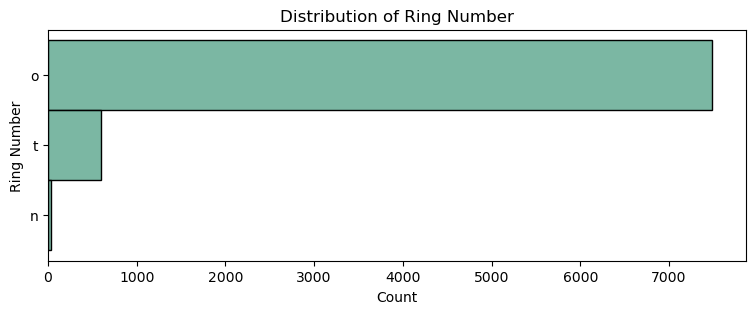

In [38]:
#Distribution of Ring Number
plt.figure(figsize=(9, 3))
sns.histplot(data=df, y="ring-number", color='#4f9f85')  # A specific color (hex code)
plt.title('Distribution of Ring Number')
plt.ylabel('Ring Number')
plt.xlabel('Count')
plt.show()

In [48]:
df['ring-number'].value_counts()

ring-number
o    7488
t     600
n      36
Name: count, dtype: int64

#### Observations :-

## Data Manipulation

In [39]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [40]:
df.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [41]:
# we need to convert to categorical variable

In [42]:
df=df.astype('category')

In [43]:
df.dtypes

class                       category
cap-shape                   category
cap-surface                 category
cap-color                   category
bruises                     category
odor                        category
gill-attachment             category
gill-spacing                category
gill-size                   category
gill-color                  category
stalk-shape                 category
stalk-root                  category
stalk-surface-above-ring    category
stalk-surface-below-ring    category
stalk-color-above-ring      category
stalk-color-below-ring      category
veil-type                   category
veil-color                  category
ring-number                 category
ring-type                   category
spore-print-color           category
population                  category
habitat                     category
dtype: object

In [44]:
#Importing label encoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

#### Label Encoding

In [45]:
for column in df.columns:
    df[column]=le.fit_transform(df[column])

In [46]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


#### Splitting dataset into x and y

In [47]:
X=df.drop('class',axis=1) #Independent variable
y=df['class'] #Dependent variable

In [48]:
#Shape of X
X.shape

(8124, 22)

In [49]:
#shape of y
y.shape

(8124,)

#### Principal Component Analysis

In [59]:
#reduce the data and also preserve  highly  corelated datas.
from sklearn.decomposition import PCA
pca1=PCA(n_components=8)
X1=pca1.fit_transform(X)

In [60]:
pca1.explained_variance_ratio_

array([0.33758733, 0.16581098, 0.12285821, 0.06796611, 0.05831173,
       0.05092539, 0.04670841, 0.03908416])

In [61]:
total_data=sum(pca1.explained_variance_ratio_) 
print(" Model has successfully captured ",round(total_data,2)*100,'% of data')

 Model has successfully captured  89.0 % of data


#### Splitting data into training and testing

In [62]:
X_train,X_test,y_train,y_test=train_test_split(X1,y,test_size=0.3,random_state=60)

In [64]:
#Importing ml algorithms

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

#### Model training

In [65]:
#Training the model by different algorithms

In [66]:
lr=LogisticRegression()
lr.fit(X_train,y_train)

knn=KNeighborsClassifier()
knn.fit(X_train,y_train)

svc=SVC()
svc.fit(X_train,y_train)

dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

rf=RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

#### Predicting  on test data

In [67]:
y_pred1=lr.predict(X_test)
y_pred2=knn.predict(X_test)
y_pred3=svc.predict(X_test)
y_pred4=dt.predict(X_test)
y_pred5=rf.predict(X_test)

In [68]:
#Evaluating algorithms
print("Accuracy of LogisticRegression :-",accuracy_score(y_test,y_pred1))
print("Accuracy of KNeighborsClassifier :-",accuracy_score(y_test,y_pred2))
print("Accuracy of SVC :-",accuracy_score(y_test,y_pred3))
print("Accuracy of DecisionTreeClassifier :-",accuracy_score(y_test,y_pred4))
print("Accuracy of RandomForestClassifier :-",accuracy_score(y_test,y_pred5))

Accuracy of LogisticRegression :- 0.8248564397046759
Accuracy of KNeighborsClassifier :- 0.9963084495488105
Accuracy of SVC :- 0.977850697292863
Accuracy of DecisionTreeClassifier :- 0.9889253486464314
Accuracy of RandomForestClassifier :- 0.9995898277276456


In [69]:
#Evaluating algorithms
print("Accuracy of LogisticRegression :-",(accuracy_score(y_test,y_pred1))*100)
print("Accuracy of KNeighborsClassifier :-",(accuracy_score(y_test,y_pred2))*100)
print("Accuracy of SVC :-",(accuracy_score(y_test,y_pred3))*100)
print("Accuracy of DecisionTreeClassifier :-",(accuracy_score(y_test,y_pred4))*100)
print("Accuracy of RandomForestClassifier :-",(accuracy_score(y_test,y_pred5))*100)

Accuracy of LogisticRegression :- 82.48564397046759
Accuracy of KNeighborsClassifier :- 99.63084495488104
Accuracy of SVC :- 97.7850697292863
Accuracy of DecisionTreeClassifier :- 98.89253486464314
Accuracy of RandomForestClassifier :- 99.95898277276456


In [70]:
#random forest gives the best result
#Save the model
rf_model=RandomForestClassifier()
rf_model.fit(X1,y)

RandomForestClassifier()

In [71]:
import joblib

In [72]:
joblib.dump(rf_model,"Mushroom_Prediction")

['Mushroom_Prediction']

In [73]:
model=joblib.load('Mushroom_Prediction')

#### Prediction

In [74]:
#Predicting the model using different inputs

In [75]:
p=model.predict(pca1.transform([[5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,0,2,1,4,3,2,1]]))

In [76]:
if p[0]==1:
    print("Poisionus Mushroom")
elif p[0]==0:
    print("Edible Mushroom")


Edible Mushroom
